
The goal of this project is to:
1.   Check credit card holder's behaviors, trends and factors to identify default risks
2.   Predicting if borrower is going to default in next month or not given all the borrower and payment information
3.  Using cluster analysis to segment the portfolio so that we can improve the model prediction accuracy for each segment
4. Checking techniques to make a prediction 
5. Assessing if clustering helps us to improve the model performance or not




Let's get the datasets for this project now. This dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005.

Original Data can be found here:

Lichman, M. (2013). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.

Let's import all the library needed for doing this information

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving UCI_Credit_Card.csv to UCI_Credit_Card.csv


In [ ]:
import io
uci = pd.read_csv(io.BytesIO(uploaded['UCI_Credit_Card.csv']))

Let's explore the data now

In [ ]:
uci.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [ ]:
uci.shape

(30000, 25)

In [ ]:
uci.dtypes

ID                              int64
LIMIT_BAL                     float64
SEX                             int64
EDUCATION                       int64
MARRIAGE                        int64
AGE                             int64
PAY_0                           int64
PAY_2                           int64
PAY_3                           int64
PAY_4                           int64
PAY_5                           int64
PAY_6                           int64
BILL_AMT1                     float64
BILL_AMT2                     float64
BILL_AMT3                     float64
BILL_AMT4                     float64
BILL_AMT5                     float64
BILL_AMT6                     float64
PAY_AMT1                      float64
PAY_AMT2                      float64
PAY_AMT3                      float64
PAY_AMT4                      float64
PAY_AMT5                      float64
PAY_AMT6                      float64
default.payment.next.month      int64
dtype: object

Let's what are the variables we have 

In [ ]:
uci.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

Here are information about all the variables we have

There are 25 variables:

ID: ID of each client

LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit

SEX: Gender (1=male, 2=female)

EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)

MARRIAGE: Marital status (1=married, 2=single, 3=others)

AGE: Age in years

PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above)

PAY_2: Repayment status in August, 2005 (scale same as above)

PAY_3: Repayment status in July, 2005 (scale same as above)

PAY_4: Repayment status in June, 2005 (scale same as above)

PAY_5: Repayment status in May, 2005 (scale same as above)

PAY_6: Repayment status in April, 2005 (scale same as above)

BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)

BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)

BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)

BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)

BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)

BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)

PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)

PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)

PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)

PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)

PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)

PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
default.payment.next.month: Default payment (1=yes, 0=no)

#### Let's check if we have missing values. First sum calculates for rows and second sum calculates for columns. This gives us sum of missing values in both row and columns together. Please note that this may not be the actual case at Bank level data and we might would need to do some data imputations for missing values, or remove columns if we have too much data for any variables or make a model to impute missing values for any particular variable

In [ ]:
uci.isnull().sum().sum()

0

So, we have no missing values as this data seems to be already prepared for eductional purpose by the UCI

Let's check if we have duplicates

In [ ]:
uci[uci.duplicated()]

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month


We don't have duplicates either, if we would had then we might need to inspect what caused the duplicates, if they are really duplicates or not. If yes then we might need to remove the redundant observation

### Since, we have data from April to September, I would assume that we are in September and we want to predict if borrower going to default in October and if yes then by what amount

We have Limit_bal varibale which is basically a credit limit for all the credit card holders. Let's visualize limit according to education, sex, marriage and age

In [ ]:
#Let's get the visualization library
import seaborn as sns

import matplotlib.pyplot as mp
%matplotlib inline

In [ ]:
uci[['SEX','LIMIT_BAL']].groupby('SEX').describe()

LIMIT_BAL                                ...                               
        count           mean            std  ...       50%       75%        max
SEX                                          ...                               
1     11888.0  163519.825034  136250.481355  ...  130000.0  240000.0   800000.0
2     18112.0  170086.462014  125231.777960  ...  150000.0  240000.0  1000000.0

[2 rows x 8 columns]

So, we have 11,888 accounts of male and 18,112 Female accounts. Credit limit maximum, average,first quartile, median are more for Females than males. This definitely tells good information about the market there. Females are either applying for more credit cards or getting approved, getting more maximum limits and average limits than their male counterparts 

In [ ]:
edu=uci[['EDUCATION','LIMIT_BAL']].groupby('EDUCATION').describe()

In [ ]:
edu

LIMIT_BAL                 ...                     
              count           mean  ...       75%        max
EDUCATION                           ...                     
0              14.0  217142.857143  ...  265000.0   360000.0
1           10585.0  212956.069910  ...  300000.0  1000000.0
2           14030.0  147062.437634  ...  210000.0   800000.0
3            4917.0  126550.270490  ...  180000.0   760000.0
4             123.0  220894.308943  ...  280000.0   710000.0
5             280.0  168164.285714  ...  230000.0   550000.0
6              51.0  148235.294118  ...  200000.0   540000.0

[7 rows x 8 columns]

We have following definitings for EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown).
We can see graduate school education level has more mean, first quartile, 2nd quartile, median and maximum credit limit than the university or high school education. Credit Limit certainly has direct correlation with education. More is the education, more is the credit limit.

Here, 0,5,6 are unknown education accounts. While education 0 has the highest minimum credit limit and maximun 

In [ ]:
edu1=edu['LIMIT_BAL'][['mean','std','min', '25%', '50%', '75%', 'max']]

In [ ]:
#edu1.reset_index(inplace=True)

In [ ]:
edu1.columns

Index(['mean', 'std', 'min', '25%', '50%', '75%', 'max'], dtype='object')

Text(0, 0.5, 'Credit Limit')

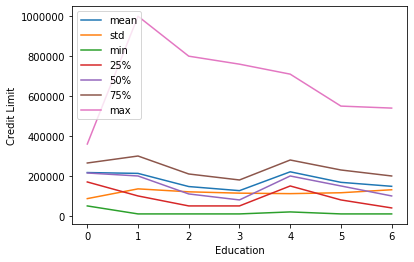

In [ ]:
fig=plt.figure()
ax = plt.subplot(111)
ax=plt.plot(edu1)
plt.legend(['mean', 'std', 'min', '25%', '50%', '75%', 'max'])
plt.xlabel('Education')
plt.ylabel('Credit Limit')


We can see that that for education lable 1, almost all the indicators are high

Let's see how's the credit limit for marriage 

In [ ]:
marr=uci[['MARRIAGE','LIMIT_BAL']].groupby('MARRIAGE').describe()

In [ ]:
marr

LIMIT_BAL                                ...                               
             count           mean            std  ...       50%       75%        max
MARRIAGE                                          ...                               
0             54.0  132962.962963   84331.547615  ...  115000.0  200000.0   360000.0
1          13659.0  182200.893184  133382.262668  ...  160000.0  260000.0  1000000.0
2          15964.0  156413.660737  125673.426316  ...  130000.0  220000.0   800000.0
3            323.0   98080.495356   96542.879913  ...   60000.0  130000.0   500000.0

[4 rows x 8 columns]

In [ ]:
marr1=marr['LIMIT_BAL'][['mean','std','min', '25%', '50%', '75%', 'max']]

In [ ]:
marr1.columns

Index(['mean', 'std', 'min', '25%', '50%', '75%', 'max'], dtype='object')

Text(0, 0.5, 'Credit Limit')

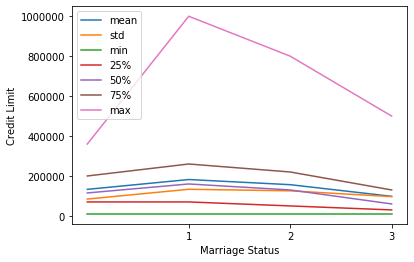

In [ ]:
fig1=plt.figure()
ax1 = plt.subplot()
ax1=plt.plot(marr1)
plt.legend(['mean', 'std', 'min', '25%', '50%', '75%', 'max'])
plt.xticks(range(1, 4))
plt.xlabel('Marriage Status')
plt.ylabel('Credit Limit')


We have this information for MARRIAGE: Marital status (1=married, 2=single, 3=others). Clearly Singles either apply for more credit cards or they get more approval. However, more number of accounts doesn't mean more credit limit. Married people are offered more credit limit both in terms of average, quartiles or maximum redit limit. We again have 0 status as marriage column. Firm would want to find out why marriage status is 1 despite of having single, married and others. these values can be missing values which has just been imputed

Age is a criticle factor. As we don't have bucket for age so, we need to make a bucket for age so, that we can we can have maximum predictibility

In [ ]:
age=uci[['AGE','LIMIT_BAL']].groupby('AGE').describe()

In [ ]:
age

LIMIT_BAL                                ...                               
        count           mean            std  ...       50%       75%        max
AGE                                          ...                               
21       67.0   23283.582090   11466.427900  ...   20000.0   30000.0    60000.0
22      560.0   37928.571429   25129.259502  ...   30000.0   50000.0   200000.0
23      931.0   59752.953813   47270.022547  ...   50000.0   80000.0   500000.0
24     1127.0   75661.047028   64709.231595  ...   50000.0  100000.0   420000.0
25     1186.0  102731.871838   84777.936462  ...   80000.0  140000.0   500000.0
26     1256.0  128813.694268   96353.980537  ...  100000.0  180000.0   500000.0
27     1477.0  147941.773866  106758.544629  ...  130000.0  200000.0   500000.0
28     1409.0  170943.931867  117172.672003  ...  150000.0  230000.0   750000.0
29     1605.0  179401.869159  120538.654396  ...  150000.0  250000.0   670000.0
30     1395.0  189591.397849  120523.925296  ...  180000.0  260000.0   680000.0
31     1217.0  193755.135579  128937.137345  ...  180000.0  280000.0   630000.0
32     1158.0  200397.236615  130828.148943  ...  180000.0  280000.0   710000.0
33     1146.0  196815.008726  129646.731230  ...  180000.0  280000.0   710000.0
34     1162.0  199388.984509  132861.783008  ...  180000.0  280000.0   700000.0
35     1113.0  198292.902066  132809.149709  ...  180000.0  280000.0   740000.0
36     1108.0  195216.606498  130798.561877  ...  180000.0  280000.0   700000.0
37     1041.0  200566.762728  134487.508749  ...  180000.0  280000.0   730000.0
38      944.0  192923.728814  139388.645882  ...  170000.0  280000.0   720000.0
39      954.0  205880.503145  138507.675065  ...  190000.0  290000.0   700000.0
40      870.0  188448.275862  129911.916571  ...  170000.0  250000.0   750000.0
41      824.0  189672.330097  137254.858374  ...  160000.0  260000.0   780000.0
42      794.0  187969.370277  135128.642447  ...  160000.0  277500.0   680000.0
43      670.0  180850.746269  134871.998635  ...  160000.0  260000.0   750000.0
44      700.0  186600.000000  137739.298856  ...  170000.0  260000.0   650000.0
45      617.0  172706.645057  135037.151590  ...  150000.0  250000.0   720000.0
46      570.0  175817.543860  143506.948722  ...  140000.0  260000.0   800000.0
47      501.0  167924.151697  138626.412474  ...  130000.0  240000.0  1000000.0
48      466.0  168703.862661  132828.882831  ...  140000.0  240000.0   780000.0
49      452.0  172123.893805  143662.584040  ...  130000.0  262500.0   560000.0
50      411.0  180851.581509  148745.993563  ...  140000.0  270000.0   740000.0
51      340.0  160558.823529  137765.499356  ...  120000.0  240000.0   710000.0
52      304.0  153618.421053  134596.570370  ...  100000.0  220000.0   620000.0
53      325.0  174461.538462  150123.722322  ...  130000.0  260000.0   800000.0
54      247.0  171700.404858  150962.842437  ...  120000.0  230000.0   760000.0
55      209.0  150956.937799  127859.760398  ...  100000.0  220000.0   660000.0
56      178.0  146910.112360  132336.682459  ...  100000.0  230000.0   730000.0
57      122.0  160819.672131  141670.028465  ...   95000.0  255000.0   580000.0
58      122.0  169016.393443  138124.448833  ...  140000.0  240000.0   500000.0
59       83.0  133012.048193  127955.164973  ...   80000.0  185000.0   500000.0
60       67.0  131940.298507  102413.878173  ...  100000.0  200000.0   480000.0
61       56.0  184285.714286  162087.037706  ...  140000.0  282500.0   510000.0
62       44.0  157045.454545  129768.659015  ...  110000.0  252500.0   500000.0
63       31.0  197741.935484  143937.710542  ...  180000.0  280000.0   590000.0
64       31.0  232258.064516  169306.618839  ...  190000.0  355000.0   680000.0
65       24.0  201666.666667  105156.887623  ...  210000.0  270000.0   360000.0
66       25.0  252000.000000  128484.759148  ...  210000.0  360000.0   500000.0
67       16.0  198125.000000  174555.387580  ...  195000.0  240000.0   580000.0
68  

So, we have a card holders ranging from 21 to 79 with most of the accounts from 22 to 58. There are merely 15 accounts above the age of 70

In [ ]:
age1=age['LIMIT_BAL'][['mean','std','min', '25%', '50%', '75%', 'max']]

<function matplotlib.pyplot.show>

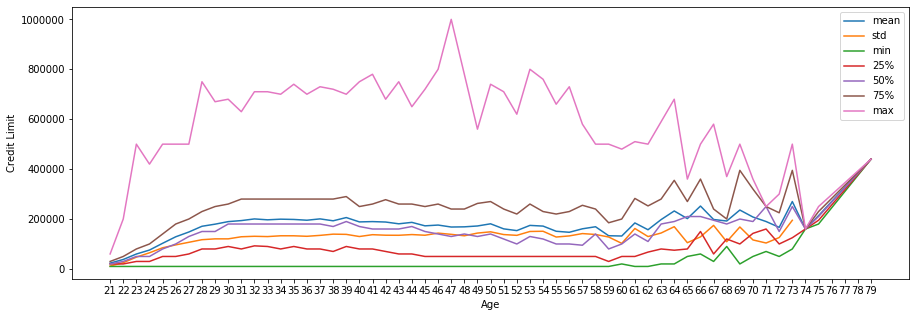

In [ ]:
fig2=plt.figure(figsize=(15,5))
ax2 = plt.subplot()
ax2=plt.plot(age1)
plt.legend(['mean', 'std', 'min', '25%', '50%', '75%', 'max'])
plt.xticks(range(21,80))
plt.xlabel('Age')
plt.ylabel('Credit Limit')
plt.show


We can see how age group from 28 to 57 has almost all mean, max and min credit limit higher than the other age group. 

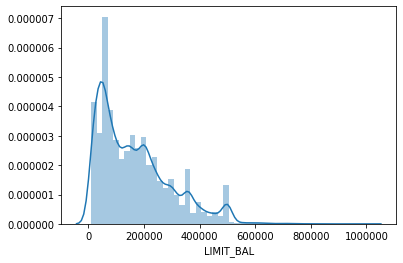

In [ ]:
sns.distplot(uci['LIMIT_BAL'])

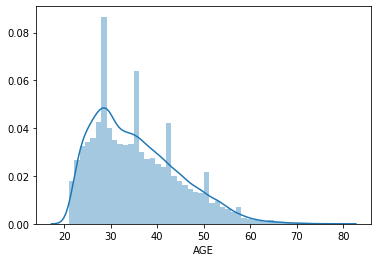

In [ ]:
sns.distplot(uci['AGE'])

Please note that we have AGE and LIMIT BAL as borrower's information and continuous variables. Rest all of them like, SEX, EDUCATION,MARRIAGE are categorical and hence Normal Distribution plot is not appropriate for those variables. We can see in above distribution plot that both Credit Limit and age are tilted towards left indicating there are less people above age 60 going for credit cards or limit above than 50000

#### Let's explore some of the behavioral information that we have from Bank itself for the card holders

In [ ]:
 uci_payment_status=uci[['PAY_0','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']]

In [ ]:
uci_payment_status.head(10)

,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
0,2,2,-1,-1,-2,-2
1,-1,2,0,0,0,2
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,-1,0,-1,0,0,0
5,0,0,0,0,0,0
6,0,0,0,0,0,0
7,0,-1,-1,0,0,-1
8,0,0,2,0,0,0
9,-2,-2,-2,-2,-1,-1


This is the definition of this variable PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above)

Let's see payment status for the month of April first. This is the first time payment status recorded for above borrowers. Then we would try to find how many defaulters from April default in May following June, July, August and September


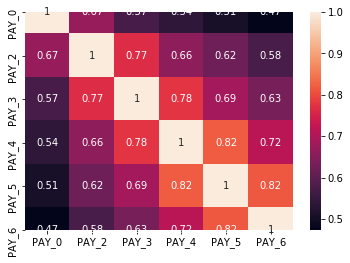

In [ ]:
#Let's try to see correlations between payment status actually.
sns.heatmap(uci_payment_status.corr(),annot=True)

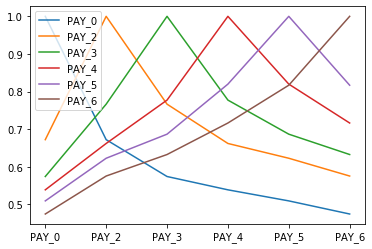

In [ ]:
plt.plot(uci_payment_status.corr())
plt.legend(labels=['PAY_0','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6'])

In above heat map we can see that there is strong correlation between Payment status in April and May. Similarly little less correlation with June, July, August and minimum for September. It can be seen that correlation between payment of previous month and next months are high but as months goes pass by, correlations decreases. Hence, for the month of September, payment status of August, July, June , May and April matters subsequently in decreasing order.

In [ ]:
uci_payment_status[['PAY_0','PAY_2']].groupby('PAY_2').count()

,PAY_0
PAY_2,
-2,3782
-1,6050
0,15730
1,28
2,3927
3,326
4,99
5,25
6,12


So, upon research and reading discussions, I found out that -2,-1,0 all three payment status owes nothing to the bank and hence, they have been paying their dues on time. There are 25562 accounts who paid their dues in August paid their bills on time in September as well. There are people who didn't paid for 1 months but paid in August but again didn't paid in September. Thus here 28 accounts who didn't paid in July, paid in August and then again didn't paid in September. These are indeterminate customers and many banks make separate models to predict payment behavior of these customers. 

There are 3927 accounts who didn't paid in August as well as September. So, it is quite evident that if card holder don't pay in 1st month then there is more chances of deafulting in 2nd month as well and so on.

In [ ]:
uci_new_paysts=uci[['PAY_0','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].replace([-2,-1,0],0)

In [ ]:
uci.drop(['PAY_0','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6'],axis=1,inplace=True)

In [ ]:
uci=pd.concat([uci,uci_new_paysts],axis=1)

In [ ]:
uci.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
0,1,20000.0,2,2,1,24,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,2,2,0,0,0,0
1,2,120000.0,2,2,2,26,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,0,2,0,0,0,2
2,3,90000.0,2,2,2,34,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,0,0,0,0,0,0
3,4,50000.0,2,2,1,37,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,0,0,0,0,0,0
4,5,50000.0,1,2,1,57,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,0,0,0,0,0,0


#### Let's try to explore bill amounts now. 

In [ ]:
uci_bill_amount= uci[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']]

In [ ]:
uci_bill_amount.head()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
0,3913.0,3102.0,689.0,0.0,0.0,0.0
1,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0
2,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0
3,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0
4,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0


This is the desription for Bill amount:
    
BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)

BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)

BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)

BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)

BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)

BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)

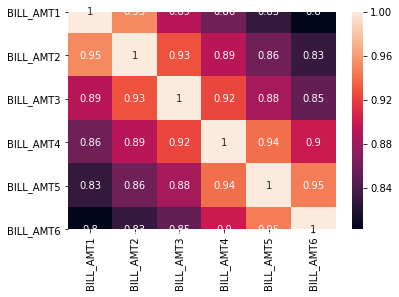

In [ ]:
#Let's start with checking correlations between Bill Amounts

sns.heatmap(uci_bill_amount.corr(),annot=True)

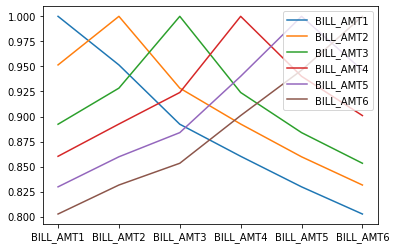

In [ ]:
plt.plot(uci_bill_amount.corr())
plt.legend(labels=['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6'])

Behaviors in card holders can be inferred clearly through above plot and heatmap. Bill amount in September is 95% correlated with the bill amount in August, 89% correlated with July amount, 86% with June and as months passes by the correlation decreases. So, it indicates that bill amount goes on increasing because of non payment. In other terms if bill amount is high in one month then there is more chance that borrower will not pay in full and leading to higher bill amount in subsequent months

#### Let's visualize the payment amounts now

In [ ]:
uci_payment_amount= uci[['PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']]

In [ ]:
uci_payment_amount.head()

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,0.0,689.0,0.0,0.0,0.0,0.0
1,0.0,1000.0,1000.0,1000.0,0.0,2000.0
2,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
4,2000.0,36681.0,10000.0,9000.0,689.0,679.0


1. PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
2. PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
3. PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
4. PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
5. PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
6. PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)

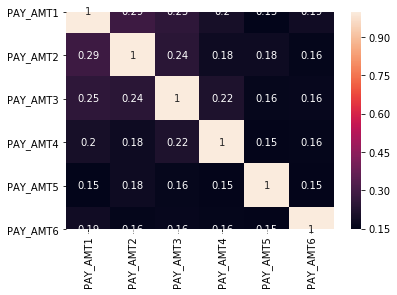

In [ ]:
#Let's start with checking correlations between Bill Amounts

sns.heatmap(uci_payment_amount.corr(),annot=True)

We can see that, we have less correlation with payment amount between months because of unexpected income or bill amount in months. However, there are still some correlations between months but not that much as it is between bill amount and payment status

Let's try to see if we have relation with payment status and borrower's info

In [ ]:
uci_male=uci[uci['SEX']==1]
uci_male.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
4,5,50000.0,1,2,1,57,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,0,0,0,0,0,0
5,6,50000.0,1,1,2,37,64400.0,57069.0,57608.0,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0,0,0,0,0,0,0
6,7,500000.0,1,1,2,29,367965.0,412023.0,445007.0,542653.0,483003.0,473944.0,55000.0,40000.0,38000.0,20239.0,13750.0,13770.0,0,0,0,0,0,0,0
9,10,20000.0,1,3,2,35,0.0,0.0,0.0,0.0,13007.0,13912.0,0.0,0.0,0.0,13007.0,1122.0,0.0,0,0,0,0,0,0,0
13,14,70000.0,1,2,2,30,65802.0,67369.0,65701.0,66782.0,36137.0,36894.0,3200.0,0.0,3000.0,3000.0,1500.0,0.0,1,1,2,2,0,0,2


In [ ]:
uci_female=uci[uci['SEX']==2]

In [ ]:
fe_0=uci_female[['PAY_0','SEX']].groupby('PAY_0').count()/18112*100
fe_2=uci_female[['PAY_2','SEX']].groupby('PAY_2').count()/18112*100
fe_3=uci_female[['PAY_3','SEX']].groupby('PAY_3').count()/18112*100
fe_4=uci_female[['PAY_4','SEX']].groupby('PAY_4').count()/18112*100
fe_5=uci_female[['PAY_5','SEX']].groupby('PAY_5').count()/18112*100
fe_6=uci_female[['PAY_6','SEX']].groupby('PAY_6').count()/18112*100


In [ ]:
female_status=pd.concat([fe_0,fe_2,fe_3,fe_4,fe_5,fe_6],axis=1)
female_status.columns=['PAY_0','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
female_status

,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
0,78.113958,86.384717,87.030698,89.217094,90.928666,90.415194
1,12.124558,0.077297,NaN,NaN,NaN,NaN
2,8.541299,12.240504,11.953401,9.927120,8.210027,8.767668
3,0.899956,0.938604,0.618375,0.425133,0.452739,0.491387
4,0.176678,0.215327,0.198763,0.171157,0.209806,0.132509
5,0.044170,0.060733,0.060733,0.093860,0.049691,0.027606
6,0.027606,0.027606,0.060733,0.016564,NaN,0.038648
7,0.022085,0.049691,0.077297,0.149072,0.149072,0.126988
8,0.049691,0.005521,NaN,NaN,NaN,NaN


In [ ]:
me_0=uci_male[['PAY_0','SEX']].groupby('PAY_0').count()/11888*100
me_2=uci_male[['PAY_2','SEX']].groupby('PAY_2').count()/11888*100
me_3=uci_male[['PAY_3','SEX']].groupby('PAY_3').count()/11888*100
me_4=uci_male[['PAY_4','SEX']].groupby('PAY_4').count()/11888*100
me_5=uci_male[['PAY_5','SEX']].groupby('PAY_5').count()/11888*100
me_6=uci_male[['PAY_6','SEX']].groupby('PAY_6').count()/11888*100

In [ ]:
male_status=pd.concat([me_0,me_2,me_3,me_4,me_5,me_6],axis=1)
male_status.columns=['PAY_0','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
male_status

,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
0,75.992598,83.411844,84.320323,86.902759,88.854307,88.702894
1,12.550471,0.117766,0.033647,0.016824,NaN,NaN
2,9.421265,14.384253,13.913190,11.448520,9.581090,9.909152
3,1.337483,1.312248,1.076716,0.866420,0.807537,0.799125
4,0.370121,0.504711,0.336474,0.319650,0.386945,0.210296
5,0.151413,0.117766,0.084118,0.151413,0.067295,0.067295
6,0.050471,0.058883,0.100942,0.016824,0.033647,0.100942
7,0.042059,0.092530,0.109354,0.260767,0.260767,0.193472
8,0.084118,NaN,0.025236,0.016824,0.008412,0.016824


Since, percentages of population making payments are almost equal for all 6 months, gender would not be appropriate choice to segment the variable

Text(0.5, 1.0, 'PAY_3')

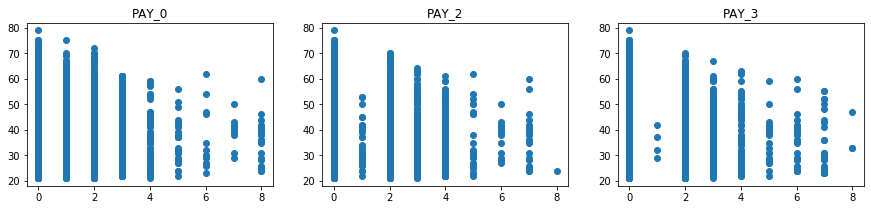

In [ ]:
fig,axes=plt.subplots(1,3,figsize=(15,3))#we are able to index the axes because its an array
axes[0].scatter(uci['PAY_0'],uci['AGE'])
axes[0].set_title('PAY_0')
axes[1].scatter(uci['PAY_2'],uci['AGE'])
axes[1].set_title('PAY_2')#similarly we can do setting x and y lab
axes[2].scatter(uci['PAY_3'],uci['AGE'],)
axes[2].set_title('PAY_3')#similarly we can do setting x and y lab

Text(0.5, 1.0, 'PAY_6')

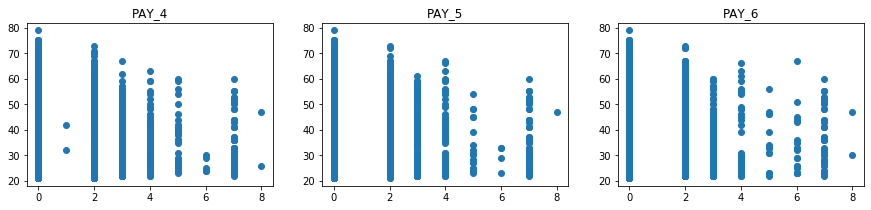

In [ ]:
fig,axes=plt.subplots(1,3,figsize=(15,3))#we are able to index the axes because its an array
axes[0].scatter(uci['PAY_4'],uci['AGE'])
axes[0].set_title('PAY_4')
axes[1].scatter(uci['PAY_5'],uci['AGE'])
axes[1].set_title('PAY_5')#similarly we can do setting x and y lab
axes[2].scatter(uci['PAY_6'],uci['AGE'],)
axes[2].set_title('PAY_6')#similarly we can do setting x and y lab

We can clearly see there are some special trend showing in all of the scatterplots. Younger people tends to not pay dues for longer duration then older customers.  

For this project or say credit card data, we have predictors as all variables except id and next payment due status. Our target variable is next payment due status. We also need to statndardize data to make mean 0 and standard deviation qual to 1 so that different scale can't affect our modeling.

In [ ]:
uci_x=uci[['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']]
from sklearn import preprocessing
Cluster_data = preprocessing.StandardScaler().fit(uci_x).transform(uci_x)

In [ ]:
Cluster_data

array([[-1.13672015,  0.81016074,  0.18582826, ..., -0.30806256,
        -0.31413612, -0.29338206],
       [-0.3659805 ,  0.81016074,  0.18582826, ..., -0.24422965,
        -0.31413612, -0.18087821],
       [-0.59720239,  0.81016074,  0.18582826, ..., -0.24422965,
        -0.24868274, -0.01212243],
       ...,
       [-1.05964618, -1.23432296,  0.18582826, ..., -0.03996431,
        -0.18322937, -0.11900109],
       [-0.67427636, -1.23432296,  1.45111372, ..., -0.18512036,
         3.15253642, -0.19190359],
       [-0.90549825, -1.23432296,  0.18582826, ..., -0.24422965,
        -0.24868274, -0.23713013]])

In [ ]:
uci_x.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
      dtype='object')

### Let's try to fit the Logistic regression model and see our accuracy

In [ ]:
#Let's define independent and dependent factors
X=Cluster_data
Y=uci['default.payment.next.month']

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X,Y)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
from sklearn.model_selection import cross_val_score
accuracies=cross_val_score(estimator=LR,X=X,y=Y,cv=10)

In [ ]:
accuracies

array([0.80373209, 0.8053982 , 0.80773076, 0.80739753, 0.819     ,
       0.828     , 0.82927643, 0.82427476, 0.82627543, 0.82327442])

Text(0.5, 1.0, 'Accuracy for Logistic Regression')

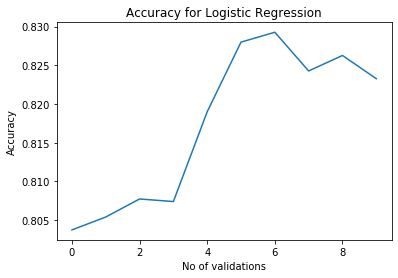

In [ ]:
plt.plot(accuracies)
plt.xlabel("No of validations")
plt.ylabel("Accuracy")
plt.title("Accuracy for Logistic Regression")

### We are getting accuracy of almost 83% (82.927%). Let's check if we can get accuracy better than this by dividing the portfolio into clusters and running regression in each of them.

In [ ]:
from sklearn.cluster import KMeans
clusterNum = 4
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(Cluster_data)
labels = k_means.labels_
print(labels)

[2 0 0 ... 3 2 2]


In [ ]:
k_means_cluster_centers = k_means.cluster_centers_
k_means_cluster_centers

array([[-0.15052785, -0.01518099, -0.21780098,  0.89795705, -0.54261976,
        -0.18143875, -0.21275885, -0.22024159, -0.24924904, -0.2311205 ,
        -0.19865099, -0.28510004, -0.29468915, -0.2994101 , -0.30581772,
        -0.30619617, -0.3003023 , -0.08027001, -0.0651586 , -0.07005151,
        -0.06878603, -0.06414947, -0.05440352],
       [ 0.89397052, -0.04228112, -0.0452887 , -0.07840416,  0.1610151 ,
        -0.17173212, -0.16959974, -0.19828619, -0.20690578, -0.18938349,
        -0.16530208,  2.00258428,  2.05888999,  2.07039045,  2.09390866,
         2.06336281,  2.01647977,  0.6685843 ,  0.52278033,  0.59039727,
         0.54985794,  0.57115863,  0.48291771],
       [ 0.04857224,  0.06000541,  0.21679362, -0.95907252,  0.55934361,
        -0.17302152, -0.20979226, -0.23751692, -0.25502657, -0.24303711,
        -0.21968296, -0.29214555, -0.30835182, -0.31549273, -0.32757182,
        -0.32722087, -0.32397418, -0.07296211, -0.05546437, -0.06108046,
        -0.05345927, -0.0644

In [ ]:
kmeansdata=uci_x
kmeansdata["Clus_km"] = labels
kmeansdata.head(5)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Clus_km
0,20000.0,2,2,1,24,2,2,0,0,0,0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,2
1,120000.0,2,2,2,26,0,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,0
2,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,2
4,50000.0,1,2,1,57,0,0,0,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,2


In [ ]:
uci_x.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'Clus_km'],
      dtype='object')

In [ ]:
k_clus_description=kmeansdata.groupby('Clus_km').describe()


In [ ]:
print(k_clus_description)

        LIMIT_BAL                                ... PAY_AMT6                   
            count           mean            std  ...      50%      75%       max
Clus_km                                          ...                            
0         12351.0  147943.486357  119780.759424  ...   1100.0   3000.0  403500.0
1          3566.0  283403.724061  119345.409663  ...   5900.0  10000.0  528666.0
2         11194.0  173800.428801  129602.287040  ...   1105.5   3000.0  261883.0
3          2889.0   83468.328141   73424.937060  ...   1000.0   2400.0  170806.0

[4 rows x 184 columns]


In [ ]:
kmeansdata['next_month_sts']=uci['default.payment.next.month']
kmeansdata.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'Clus_km',
       'next_month_sts'],
      dtype='object')

In [ ]:
uci_x.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'Clus_km',
       'next_month_sts'],
      dtype='object')

#### Getting 1st cluster data

In [ ]:
kmean_1_cluster=kmeansdata[kmeansdata['Clus_km']==0]

In [ ]:
kmean_1_cluster.shape

(12351, 25)

In [ ]:
X_kmeans_0=kmean_1_cluster[['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2','PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']]
X_kmeans_0 = preprocessing.StandardScaler().fit(X_kmeans_0).transform(X_kmeans_0)

In [ ]:
Y_kmeans_0=kmean_1_cluster['next_month_sts']

In [ ]:
LR_kmeans_0 = LogisticRegression(C=0.01, solver='liblinear').fit(X_kmeans_0,Y_kmeans_0)
LR_kmeans_0

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
accuracies_kmeans=cross_val_score(estimator=LR_kmeans_0,X=X_kmeans_0,y=Y_kmeans_0,cv=10)

In [ ]:
accuracies_kmeans

array([0.83333333, 0.83252427, 0.83252427, 0.83090615, 0.84534413,
       0.84453441, 0.8437247 , 0.85089141, 0.84602917, 0.83954619])

We have slightly better accuracy for this cluster

#### Let's do for other clusters. 1st cluster=0, 2nd cluster=1,3rd cluster=2, 4th Cluster=3

In [ ]:
kmean_2_cluster=kmeansdata[kmeansdata['Clus_km']==1]
kmean_3_cluster=kmeansdata[kmeansdata['Clus_km']==2]
kmean_4_cluster=kmeansdata[kmeansdata['Clus_km']==3]
print(kmean_2_cluster.shape,kmean_3_cluster.shape,kmean_4_cluster.shape)

(3566, 25) (11194, 25) (2889, 25)


In [ ]:
predictor_var_list=['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2','PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

In [ ]:
X_kmeans_1=preprocessing.StandardScaler().fit((kmean_2_cluster[predictor_var_list])).transform((kmean_2_cluster[predictor_var_list]))
X_kmeans_2=preprocessing.StandardScaler().fit((kmean_3_cluster[predictor_var_list])).transform((kmean_3_cluster[predictor_var_list]))
X_kmeans_3=preprocessing.StandardScaler().fit((kmean_4_cluster[predictor_var_list])).transform((kmean_4_cluster[predictor_var_list]))

In [ ]:
Y_kmeans_1=kmean_2_cluster['next_month_sts']
Y_kmeans_2=kmean_3_cluster['next_month_sts']
Y_kmeans_3=kmean_4_cluster['next_month_sts']

In [ ]:
LR_kmeans_1 = LogisticRegression(C=0.01, solver='liblinear').fit(X_kmeans_1,Y_kmeans_1)
accuracies_kmeans_1=cross_val_score(estimator=LR_kmeans_1,X=X_kmeans_1,y=Y_kmeans_1,cv=10)
accuracies_kmeans_1

array([0.85434174, 0.85994398, 0.85994398, 0.83753501, 0.8767507 ,
       0.87394958, 0.8511236 , 0.86516854, 0.88483146, 0.87640449])

In [ ]:
LR_kmeans_2 = LogisticRegression(C=0.01, solver='liblinear').fit(X_kmeans_2,Y_kmeans_2)
accuracies_kmeans_2=cross_val_score(estimator=LR_kmeans_2,X=X_kmeans_2,y=Y_kmeans_2,cv=10)
accuracies_kmeans_2

array([0.81875   , 0.81607143, 0.80714286, 0.81517857, 0.82321429,
       0.8375    , 0.83303571, 0.8255814 , 0.82468694, 0.81484794])

In [ ]:
LR_kmeans_3 = LogisticRegression(C=0.01, solver='liblinear').fit(X_kmeans_3,Y_kmeans_3)
accuracies_kmeans_3=cross_val_score(estimator=LR_kmeans_3,X=X_kmeans_3,y=Y_kmeans_3,cv=10)
accuracies_kmeans_3

array([0.63793103, 0.63793103, 0.65862069, 0.62629758, 0.62629758,
       0.62975779, 0.69097222, 0.63541667, 0.64930556, 0.62847222])

#### Let's try to do Density based clustering

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [ ]:
db = DBSCAN(eps=0.15, min_samples=10).fit(Cluster_data)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
db_labels = db.labels_
print(db_labels)

[-1 -1 -1 ... -1 -1 -1]


In [ ]:
db_clus=uci_x
db_clus['db_clus_label']=db_labels

In [ ]:
uci_x.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'Clus_km',
       'next_month_sts', 'db_clus_label'],
      dtype='object')

In [ ]:
db_clus_description=db_clus.groupby('db_clus_label').describe()
print(db_clus_description)



              LIMIT_BAL                                ... next_month_sts           
                  count           mean            std  ...            50%   75%  max
db_clus_label                                          ...                          
-1              29835.0  167955.075582  129816.849740  ...            0.0  0.00  1.0
 0                 16.0   51250.000000    3415.650255  ...            0.0  0.00  1.0
 1                 14.0  200714.285714    4746.311465  ...            0.0  1.00  1.0
 2                 30.0   21333.333333    3457.459036  ...            0.0  0.00  1.0
 3                 12.0   81666.666667    3892.494721  ...            0.0  0.00  1.0
 4                 13.0   20000.000000       0.000000  ...            0.0  0.00  1.0
 5                 27.0  204444.444444    5773.502692  ...            0.0  0.00  1.0
 6                 19.0   20526.315789    2294.157339  ...            0.0  0.00  1.0
 7                 14.0   22142.857143    6992.932068  ...       

In [ ]:
print(db_clus_description)

              LIMIT_BAL                                ... next_month_sts           
                  count           mean            std  ...            50%   75%  max
db_clus_label                                          ...                          
-1              29835.0  167955.075582  129816.849740  ...            0.0  0.00  1.0
 0                 16.0   51250.000000    3415.650255  ...            0.0  0.00  1.0
 1                 14.0  200714.285714    4746.311465  ...            0.0  1.00  1.0
 2                 30.0   21333.333333    3457.459036  ...            0.0  0.00  1.0
 3                 12.0   81666.666667    3892.494721  ...            0.0  0.00  1.0
 4                 13.0   20000.000000       0.000000  ...            0.0  0.00  1.0
 5                 27.0  204444.444444    5773.502692  ...            0.0  0.00  1.0
 6                 19.0   20526.315789    2294.157339  ...            0.0  0.00  1.0
 7                 14.0   22142.857143    6992.932068  ...       

Density Based Clustering created 6 clusters when datapoints are 0.15 eucleadean distance away and needs to have minimum of 10 datapoints to form a cluster. 1st cluster has 29918 points and 2nd cluster has 28 points, 3rd cluster has 10, 4th cluster 17, 5th cluster 17 and 6th cluster has 10 points. Since 1st cluster has like 99.72% of the data, we can consider other datapoints as outliers actually and exclude these points while modeling

In [ ]:
db_clus['next_month_sts']=uci['default.payment.next.month']
db_clus.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'Clus_km',
       'next_month_sts', 'db_clus_label'],
      dtype='object')

In [ ]:
db_Clus1_data=db_clus[db_clus['db_clus_label']==-1]

In [ ]:
X_db_data=preprocessing.StandardScaler().fit((db_Clus1_data[predictor_var_list])).transform((db_Clus1_data[predictor_var_list]))

In [ ]:
Y_db_data=db_Clus1_data['next_month_sts']

In [ ]:
LR_db_1 = LogisticRegression(C=0.01, solver='liblinear').fit(X_db_data,Y_db_data)
accuracies_db_1=cross_val_score(estimator=LR_kmeans_1,X=X_db_data,y=Y_db_data,cv=10)
accuracies_db_1

array([0.80428954, 0.80495979, 0.80864611, 0.80663539, 0.81903485,
       0.82774799, 0.82908847, 0.82433791, 0.82595573, 0.82327297])

#### So, we can see db scan is not improvement to our model at all and that's because one cluster has almost 99.72% of data and thus adds no value to the segmentation

### Let's see how Random Forest works

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
tree_lst=[5,10,15,20,25,30,35,40,45,50]
for i in range(len(tree_lst)):
    classifier_rf=RandomForestClassifier(n_estimators=tree_lst[i], criterion='entropy')
    classifier_rf.fit(X,Y)
    accuracies_rf=cross_val_score(estimator=classifier_rf,X=X,y=Y,cv=10)
    print(accuracies_rf)

[0.78473842 0.78473842 0.7874042  0.77740753 0.792      0.79566667
 0.79926642 0.79826609 0.80526842 0.79359787]
[0.79473509 0.79806731 0.79773409 0.8023992  0.80866667 0.81166667
 0.82394131 0.80460153 0.81460487 0.80826942]
[0.80406531 0.7964012  0.80706431 0.80106631 0.80766667 0.80933333
 0.82060687 0.81960654 0.82427476 0.8126042 ]
[0.80473176 0.8083972  0.80306564 0.80339887 0.80866667 0.81466667
 0.82660887 0.82494165 0.81793931 0.81493831]
[0.80273242 0.80473176 0.79973342 0.79840053 0.81266667 0.81733333
 0.82694231 0.82360787 0.82227409 0.81360453]
[0.80006664 0.80339887 0.81172942 0.80439853 0.81066667 0.82033333
 0.83327776 0.81793931 0.82260754 0.81693898]
[0.80273242 0.80073309 0.80773076 0.79906698 0.81566667 0.81866667
 0.83094365 0.82360787 0.82027342 0.81893965]
[0.80139953 0.80706431 0.80706431 0.80373209 0.81433333 0.82233333
 0.83094365 0.82527509 0.82394131 0.82194065]
[0.8083972  0.80306564 0.80339887 0.80139953 0.817      0.81866667
 0.83027676 0.82594198 0.8236

We can see maximum accuracy we have through random forest is 83.53% when number of trees are 40. This is better than logistic regression on unclustered data

Let's check for the clusters now

In [ ]:
classifier_rf=RandomForestClassifier(n_estimators=40, criterion='entropy')
classifier_rf.fit(X_kmeans_0,Y_kmeans_0)
accuracies_rf_0=cross_val_score(estimator=classifier_rf,X=X_kmeans_0,y=Y_kmeans_0,cv=10)
print(accuracies_rf_0)

[0.82686084 0.8276699  0.83171521 0.83171521 0.83967611 0.84291498
 0.84534413 0.85494327 0.85089141 0.84035656]


In [ ]:
classifier_rf=RandomForestClassifier(n_estimators=40, criterion='entropy')
classifier_rf.fit(X_kmeans_1,Y_kmeans_1)
accuracies_rf_1=cross_val_score(estimator=classifier_rf,X=X_kmeans_1,y=Y_kmeans_1,cv=10)
print(accuracies_rf_1)

[0.85714286 0.83753501 0.86554622 0.83753501 0.8627451  0.8627451
 0.86797753 0.85955056 0.86516854 0.87078652]


In [ ]:
classifier_rf=RandomForestClassifier(n_estimators=40, criterion='entropy')
classifier_rf.fit(X_kmeans_2,Y_kmeans_2)
accuracies_rf_2=cross_val_score(estimator=classifier_rf,X=X_kmeans_2,y=Y_kmeans_2,cv=10)
print(accuracies_rf_2)

[0.81964286 0.81339286 0.79821429 0.81696429 0.82053571 0.82946429
 0.82321429 0.81305903 0.81663685 0.81305903]


In [ ]:
classifier_rf=RandomForestClassifier(n_estimators=40, criterion='entropy')
classifier_rf.fit(X_kmeans_3,Y_kmeans_3)
accuracies_rf_3=cross_val_score(estimator=classifier_rf,X=X_kmeans_3,y=Y_kmeans_3,cv=10)
print(accuracies_rf_3)

[0.63793103 0.59655172 0.62413793 0.63321799 0.62629758 0.62283737
 0.68402778 0.625      0.66319444 0.64930556]


#### Let's see how Neural Network works on this

In [ ]:
from numpy import concatenate
from matplotlib import pyplot
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import LSTM
from keras.callbacks import Callback
from keras.models import Sequential
from keras.layers import LSTM, Dense, Activation
import pickle
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import sys
from queue import Queue
import json
%matplotlib inline

Using TensorFlow backend.


In [ ]:
class LossHistory(Callback):
    def on_train_begin(self, logs={}):
        self.losses = []

    def on_batch_end(self, batch, logs={}):
        sys.stdout.write(str(logs.get('loss'))+str(', '))
        sys.stdout.flush()
        self.losses.append(logs.get('loss'))
        
lr = LossHistory()

In [ ]:
len(predictor_var_list)

23

In [ ]:
uci[['default.payment.next.month','ID']].groupby('default.payment.next.month').count()

,ID
default.payment.next.month,
0,23364
1,6636


In [ ]:
number_of_neurons_layer1 = 23
number_of_neurons_layer2 = 10
number_of_neurons_layer3 = 2
number_of_epochs = 50

In [ ]:
len(X)

30000

In [ ]:
dim =  23
samples = 30000

In [ ]:
# design network
from keras import optimizers
sgd = optimizers.SGD(lr=0.01, clipnorm=1.)

model = Sequential()
model.add(Dense(number_of_neurons_layer1,input_shape=(dim, ), activation='relu'))
model.add(Dense(number_of_neurons_layer2, activation='relu'))
model.add(Dense(number_of_neurons_layer3, activation='relu'))
model.compile(loss='sparse_categorical_crossentropy', optimizer=sgd)

def train(data,label):
    model.fit(data, label, epochs=number_of_epochs, batch_size=256, validation_data=(data, label), verbose=0, shuffle=True,callbacks=[lr])

def score(data):
    return model.predict(data)

In [ ]:
print(X.shape,Y.shape)

(30000, 23) (30000,)


In [ ]:
features=X
label=Y

In [ ]:
train(features,label)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where








0.80506086, 0.6931475, 0.6769019, 0.735796, 0.83661085, 0.7393309, 0.7372663, 0.69043994, 0.6904399, 0.6931475, 0.6904399, 0.7448319, 0.73084617, 0.72896767, 0.7245054, 0.7372116, 0.6931475, 0.68773234, 0.69043994, 0.7349528, 0.6904398, 0.6877323, 0.7681873, 0.6931475, 0.74574053, 0.74193025, 0.69043994, 0.74069595, 0.69043994, 0.69043994, 0.7412765, 0.6931475, 0.6931475, 0.68502474, 0.6931475, 0.7375781, 0.6931475, 0.69043994, 0.6931475, 0.7386632, 0.6931475, 0.6931475, 0.6904399, 0.6931475, 0.72734076, 0.73709893, 0.6931475, 0.6931475, 0.6904399, 0.7391577, 0.69043994, 0.6823171, 0.7109724, 0.6931475, 0.6931475, 0.6931475, 0.6931475, 0.73765635, 0.6931475, 0.6931475, 0.6931475, 0.6931475, 0.6931475, 0.7388886, 0.69043994, 0.7275826, 0.69043994, 0.6877322, 0.6931475, 0.6931475, 0.69043994, 0.69043994, 0.68773234, 0.6931475, 0.6904399, 0.6931475, 0.6931475, 0.6931475, 0.69043994, 0.693

Text(0.5, 1.0, 'Loss function with Stochastic Gradient Descent Optmization')

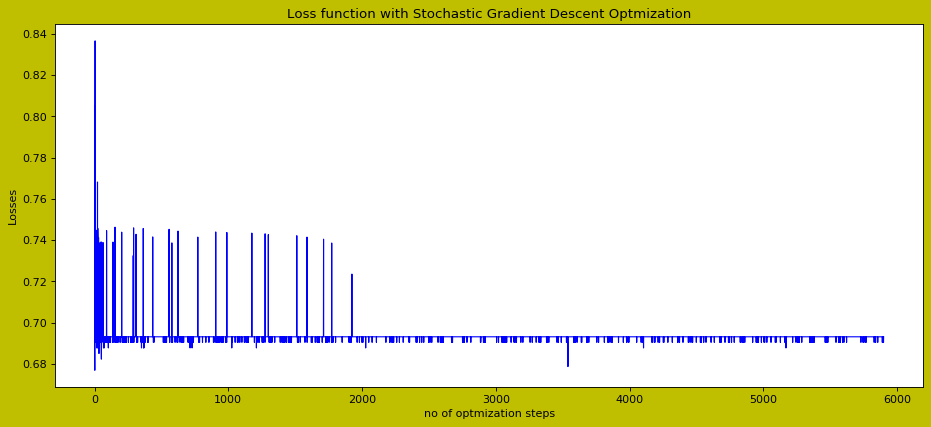

In [ ]:
fig, ax = plt.subplots(num=None, figsize=(14, 6), dpi=80, facecolor='y', edgecolor='k')
size = len(lr.losses)
ax.plot(range(0,size), lr.losses, '-', color='blue', animated = True, linewidth=1)
plt.xlabel('no of optmization steps')
plt.ylabel('Losses')
plt.title('Loss function with Stochastic Gradient Descent Optmization')

In [ ]:
min(lr.losses)

0.6769019

In [ ]:
accuracy=100-min(lr.losses)

In [ ]:
accuracy

99.32309812307358

Let's check after clustering if performance improves or not

In [ ]:
train(X_kmeans_0,Y_kmeans_0)

0.6904399, 0.6931475, 0.6931475, 0.6931475, 0.6931475, 0.6931475, 0.6931475, 0.6931475, 0.6931475, 0.6931475, 0.6931475, 0.6931475, 0.6931475, 0.6931475, 0.6931475, 0.6931475, 0.6931475, 0.6904399, 0.6931475, 0.6931475, 0.6931475, 0.6931475, 0.6931475, 0.6931475, 0.6931475, 0.6931475, 0.6931475, 0.6931475, 0.6931475, 0.6904405, 0.6931475, 0.6931475, 0.6931475, 0.6931475, 0.6931475, 0.6931475, 0.6931475, 0.6931475, 0.6931475, 0.69043994, 0.6931475, 0.6931475, 0.6904398, 0.6931475, 0.6931475, 0.6931475, 0.6931475, 0.6931475, 0.6931472, 0.6931475, 0.6931475, 0.6931475, 0.6904399, 0.6931475, 0.6931475, 0.6931475, 0.6904399, 0.6904399, 0.6931475, 0.6931475, 0.6931475, 0.6931475, 0.6931475, 0.6931475, 0.6931475, 0.6904398, 0.6931475, 0.6931475, 0.6931475, 0.6931475, 0.6931475, 0.6931475, 0.6931475, 0.6931475, 0.6931475, 0.6931475, 0.6931475, 0.6931475, 0.6931475, 0.6931475, 0.6904404, 0.6931475, 0.6931475, 0.6931475, 0.6931475, 0.6931475, 0.6931475, 0.6931475, 0.6931475, 0.6931475, 0.6931475

In [ ]:
accuracy_0=100-min(lr.losses)
accuracy_0

99.31785517930984

In [ ]:
train(X_kmeans_1,Y_kmeans_1)

0.6850252, 0.69043994, 0.6931475, 0.6904398, 0.6931475, 0.6904398, 0.6904399, 0.6931475, 0.6904399, 0.6931475, 0.68773234, 0.6931475, 0.6931475, 0.6931475, 0.68773234, 0.6931475, 0.6931475, 0.6931475, 0.6904398, 0.6877322, 0.6931475, 0.6877322, 0.6931475, 0.69043994, 0.6931475, 0.6931475, 0.6904403, 0.6902351, 0.6931475, 0.6931475, 0.6931475, 0.68502504, 0.6904399, 0.6931475, 0.69043994, 0.6904398, 0.6877323, 0.6904399, 0.6931475, 0.6931475, 0.6931475, 0.6902351, 0.6904398, 0.6823174, 0.6877322, 0.69043994, 0.6931475, 0.6931475, 0.6931475, 0.6904399, 0.6931475, 0.6931475, 0.6931475, 0.6931475, 0.69043994, 0.6931475, 0.6931475, 0.6931475, 0.6904402, 0.69043994, 0.6931475, 0.6904399, 0.6904399, 0.6877323, 0.6850246, 0.6931475, 0.6931475, 0.6931475, 0.6904398, 0.6931475, 0.6931475, 0.6904398, 0.6931475, 0.6877326, 0.69043994, 0.6931475, 0.6877322, 0.6931475, 0.6904399, 0.6904398, 0.6931475, 0.6931475, 0.6931475, 0.68732274, 0.6931475, 0.6904398, 0.6931475, 0.6931475, 0.68773234, 0.6904398

In [ ]:
accuracy_1=100-min(lr.losses)
accuracy_1

99.31768298149109

In [ ]:
train(X_kmeans_2,Y_kmeans_2)

0.6931475, 0.6931475, 0.6931475, 0.6931475, 0.6931475, 0.6931475, 0.6931475, 0.6931475, 0.69043994, 0.6931475, 0.6931475, 0.6931475, 0.6931475, 0.69043994, 0.74466777, 0.6931475, 0.6931475, 0.6931475, 0.69043994, 0.6931475, 0.6931475, 0.6931475, 0.6931475, 0.6931475, 0.6931475, 0.6931475, 0.6931475, 0.6931475, 0.6931475, 0.6931475, 0.6931475, 0.6931475, 0.74394405, 0.6931475, 0.6931475, 0.6931475, 0.6931475, 0.73384356, 0.73784316, 0.6931475, 0.6931475, 0.6931475, 0.6931475, 0.6931474, 0.7404429, 0.6931475, 0.6931475, 0.6931475, 0.6931475, 0.6931475, 0.6931475, 0.6931475, 0.6931475, 0.6931475, 0.6931475, 0.6931475, 0.6931475, 0.6931475, 0.6931475, 0.7411257, 0.6931475, 0.6931475, 0.6931475, 0.6931475, 0.6931475, 0.6931475, 0.6931475, 0.6931475, 0.6904399, 0.6931475, 0.6931475, 0.6931475, 0.6931475, 0.69043994, 0.6931475, 0.6931475, 0.6931475, 0.6931475, 0.6931475, 0.6931475, 0.6931475, 0.6931475, 0.6931475, 0.6931475, 0.6931475, 0.6931475, 0.6931475, 0.6931474, 0.6931475, 0.6931475, 0.

In [ ]:
accuracy_2=100-min(lr.losses)
accuracy_2

99.31226766109467

In [ ]:
train(X_kmeans_3,Y_kmeans_3)

0.6931475, 0.6931475, 0.6931475, 0.6931475, 0.6931475, 0.6931475, 0.6931475, 0.6931475, 0.6931475, 0.6931475, 0.6931475, 0.6931472, 0.6931475, 0.6931475, 0.6931475, 0.6931475, 0.6931475, 0.6931475, 0.6931475, 0.6931475, 0.6931475, 0.6931475, 0.6931475, 0.6931472, 0.6931475, 0.6931475, 0.6931475, 0.6931475, 0.6931475, 0.6931475, 0.6931475, 0.6931475, 0.6931475, 0.6931475, 0.6931475, 0.6931472, 0.6931475, 0.6931475, 0.6931475, 0.6931475, 0.6931475, 0.6931475, 0.6931475, 0.6931475, 0.6931475, 0.6931475, 0.6931475, 0.6931472, 0.6931475, 0.6931475, 0.6931475, 0.6931475, 0.6931475, 0.6931475, 0.6931475, 0.6931475, 0.6931475, 0.6931475, 0.6931475, 0.6931472, 0.6931475, 0.6931475, 0.6931475, 0.6931475, 0.6931475, 0.6931475, 0.6931475, 0.6931475, 0.6931475, 0.6931475, 0.6931475, 0.6931472, 0.6931475, 0.6931475, 0.6931475, 0.6931475, 0.6931475, 0.6931475, 0.6931475, 0.6931475, 0.6931475, 0.6931475, 0.6931475, 0.6931472, 0.6931475, 0.6931475, 0.6931475, 0.6931475, 0.6931475, 0.6931475, 0.6931475,

In [ ]:
accuracy_3=100-min(lr.losses)
accuracy_3

99.3068528175354

So, In case of Neural Network we didn't see any improvement in performance and that's because Neural Network model already achieved the maximum accuracy by learning from each entry of 256 batch size and 50 epoch size.